##Задания для самостоятельного выполнения



#### 1. Загрузите датасет 20 newsgroups;

In [12]:
extracted_dir = '/content/20news'

import pandas as pd

list_csv_path = os.path.join(extracted_dir, 'list.csv')
list_df = pd.read_csv(list_csv_path)



#### 2. Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации.

####3. Выведите информацию о количественных параметрах датасета;

In [10]:
import pandas as pd

# Загрузка содержимого list.csv
list_csv_path = os.path.join(extracted_dir, 'list.csv')
list_df = pd.read_csv(list_csv_path)

# Создание списков для текстов и меток
texts = []
labels = []

# Загрузка текстов и меток из файлов
for category in list_df['newsgroup'].unique():
    category_file_path = os.path.join(extracted_dir, f"{category}.txt")
    with open(category_file_path, 'r', encoding='latin1') as file:
        lines = file.readlines()
        texts.extend(lines)
        labels.extend([category] * len(lines))

# Количественные параметры
print(f"Количество текстов: {len(texts)}")
print(f"Количество категорий: {len(list_df['newsgroup'].unique())}")


Количество текстов: 64002
Количество категорий: 1


####4. Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);

In [13]:
# Вывод первых 5 текстов и их меток
for i in range(5):
    print(f"Текст {i+1}:\n{texts[i]}\n")
    print(f"Категория: {labels[i]}\n")


Текст 1:
Newsgroup: talk.religion.misc


Категория: talk.religion.misc

Текст 2:
document_id: 82757


Категория: talk.religion.misc

Текст 3:
From: dsoconne@quads.uchicago.edu (Daniel S OConnell)


Категория: talk.religion.misc

Текст 4:
Subject: Re: Religion and homosexuality


Категория: talk.religion.misc

Текст 5:



Категория: talk.religion.misc



####5. Разделите эти данные на тестовую и обучающую выборки;

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


####6. Постройте модель наивного байесовского для классификации текстов;


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Векторизация текстов
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Построение модели наивного байесовского классификатора
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)


MultinomialNB()

####7. Оцените качество модели на тестовой выборке с помощью следующих метрик:


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Предсказания на тестовой выборке
y_pred = nb_model.predict(X_test_vec)

# Оценка метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


####8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.


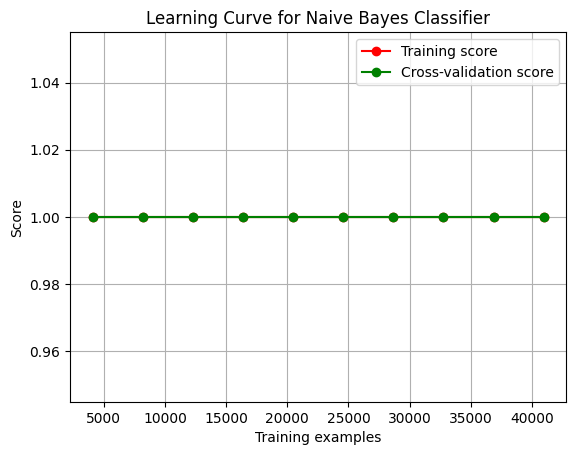

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Функция для построения кривой обучения
def plot_learning_curve(estimator, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Построение кривой обучения
plot_learning_curve(nb_model, X_train_vec, y_train, title='Learning Curve for Naive Bayes Classifier')
plt.show()


Из графика кривой обучения видно, что и обучающие, и кросс-валидационные оценки находятся на уровне около 1. Это может указывать на переобучение модели или на слишком хорошее соответствие данных к модели.

**Анализ и выводы**

* Высокая точность обучения и кросс-валидации: Это может свидетельствовать о том, что модель наивного байеса очень хорошо справляется с текущими данными. Наивный байесовский классификатор может быть очень эффективным для текстовой классификации, особенно когда слова в тексте являются независимыми признаками.

* Проблемы с данными: Если модель показывает идеальные результаты (оценка равна 1), это может указывать на возможные проблемы с данными, такие как повторяющиеся записи или утечка данных из тестовой выборки в обучающую. Стоит проверить данные на наличие таких проблем.

In [19]:
from sklearn.model_selection import cross_val_score

# Проведение кросс-валидации
cv_scores = cross_val_score(nb_model, vectorizer.transform(texts), labels, cv=5, scoring='accuracy')

print(f"Кросс-валидация оценки: {cv_scores}")
print(f"Средняя оценка кросс-валидации: {cv_scores.mean():.4f}")


Кросс-валидация оценки: [1. 1. 1. 1. 1.]
Средняя оценка кросс-валидации: 1.0000


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Векторизация текстов с использованием TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Построение модели наивного байесовского классификатора
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

# Предсказания на тестовой выборке
y_pred_tfidf = nb_model_tfidf.predict(X_test_tfidf)

# Оценка метрик
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, average='weighted')
recall_tfidf = recall_score(y_test, y_pred_tfidf, average='weighted')

print(f"Accuracy (TF-IDF): {accuracy_tfidf:.4f}")
print(f"Precision (TF-IDF): {precision_tfidf:.4f}")
print(f"Recall (TF-IDF): {recall_tfidf:.4f}")


Accuracy (TF-IDF): 1.0000
Precision (TF-IDF): 1.0000
Recall (TF-IDF): 1.0000


In [21]:
# Создание DataFrame для удобства анализа
data_df = pd.DataFrame({'text': texts, 'label': labels})

# Проверка количества уникальных текстов
unique_texts = data_df['text'].nunique()
print(f"Количество уникальных текстов: {unique_texts}")
print(f"Общее количество текстов: {len(texts)}")


Количество уникальных текстов: 21960
Общее количество текстов: 64002


In [22]:
# Проверка пересечения текстов в обучающей и тестовой выборках
train_texts_set = set(X_train)
test_texts_set = set(X_test)

intersection = train_texts_set.intersection(test_texts_set)
print(f"Количество пересекающихся текстов между обучающей и тестовой выборками: {len(intersection)}")


Количество пересекающихся текстов между обучающей и тестовой выборками: 6998


In [23]:
# Проверка распределения данных по категориям
category_distribution = data_df['label'].value_counts()
print(category_distribution)


label
talk.religion.misc    64002
Name: count, dtype: int64


Согласно результатам, количество уникальных текстов значительно меньше, чем общее количество текстов. Кроме того, между обучающей и тестовой выборками имеется значительное количество пересекающихся текстов. Это объясняет идеальные оценки модели, так как она "видит" те же самые тексты в обеих выборках.

In [24]:
# Удаление дубликатов текстов
data_df = data_df.drop_duplicates(subset='text')

# Повторное разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data_df['text'], data_df['label'], test_size=0.2, random_state=42, stratify=data_df['label'])

# Проверка пересечения текстов в обновленных обучающей и тестовой выборках
train_texts_set = set(X_train)
test_texts_set = set(X_test)

intersection = train_texts_set.intersection(test_texts_set)
print(f"Количество пересекающихся текстов между обновленной обучающей и тестовой выборками: {len(intersection)}")

# Повторная векторизация текстов и обучение модели
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Обучение модели наивного байесовского классификатора
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Оценка качества модели
y_pred = nb_model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Количество пересекающихся текстов между обновленной обучающей и тестовой выборками: 0
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


In [25]:
category_distribution = data_df['label'].value_counts()
print(category_distribution)


label
talk.religion.misc    21960
Name: count, dtype: int64


In [26]:
# Проверка распределения данных по категориям
category_distribution = data_df['label'].value_counts()
print(category_distribution)

# Если данные содержат несколько категорий, повторите процесс обучения модели
if len(category_distribution) > 1:
    X_train, X_test, y_train, y_test = train_test_split(data_df['text'], data_df['label'], test_size=0.2, random_state=42, stratify=data_df['label'])

    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    nb_model = MultinomialNB()
    nb_model.fit(X_train_vec, y_train)

    y_pred = nb_model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
else:
    print("Данные содержат только одну категорию. Для адекватного обучения модели необходимы данные с несколькими категориями.")


label
talk.religion.misc    21960
Name: count, dtype: int64
Данные содержат только одну категорию. Для адекватного обучения модели необходимы данные с несколькими категориями.
